# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [2]:
print(2631119)

2631119


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [5]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [18]:
# Write your own code here
list_bmi = pd.read_csv("data/bmi.csv")

fn_bmi = lambda height, weight: round(weight / (height**2), 2)


list_bmi["BMI"] = list(map(fn_bmi, list_bmi["Height"], list_bmi["Weight"]))


list_bmi


,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,0.00
1,Male,189,87,2,0.00
2,Female,185,110,4,0.00
3,Female,195,104,3,0.00
4,Male,149,61,3,0.00
...,...,...,...,...,...
495,Female,150,153,5,0.01
496,Female,184,121,4,0.00
497,Female,141,136,5,0.01
498,Male,150,95,5,0.00


In [16]:
fn_bmi = lambda height, weight: weight / (height**2)

# Convert "Height" and "Weight" columns to lists
height_list = list_bmi["Height"].tolist()
weight_list = list_bmi["Weight"].tolist()

# Use map to calculate BMI and round the result
list_bmi["BMI"] = list(map(lambda h, w: round(fn_bmi(h, w), 2), height_list, weight_list))

# Display the DataFrame
print(list_bmi)

     Gender  Height  Weight  Index   BMI
0      Male     174      96      4  0.00
1      Male     189      87      2  0.00
2    Female     185     110      4  0.00
3    Female     195     104      3  0.00
4      Male     149      61      3  0.00
..      ...     ...     ...    ...   ...
495  Female     150     153      5  0.01
496  Female     184     121      4  0.00
497  Female     141     136      5  0.01
498    Male     150      95      5  0.00
499    Male     173     131      5  0.00

[500 rows x 5 columns]


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [24]:
# Write your own code here
wdi_2020 = pd.read_csv("data/wdi_2020.csv")
print(wdi_2020["countryname"])
fn_upper = lambda x: x.upper()
wdi_2020["countryname_upper"] = list(map(fn_upper, wdi_2020["countryname"]))
print(wdi_2020["countryname_upper"])



0                      Afghanistan
1      Africa Eastern and Southern
2       Africa Western and Central
3                          Albania
4                          Algeria
                  ...             
261             West Bank and Gaza
262                          World
263                    Yemen, Rep.
264                         Zambia
265                       Zimbabwe
Name: countryname, Length: 266, dtype: object
0                      AFGHANISTAN
1      AFRICA EASTERN AND SOUTHERN
2       AFRICA WESTERN AND CENTRAL
3                          ALBANIA
4                          ALGERIA
                  ...             
261             WEST BANK AND GAZA
262                          WORLD
263                    YEMEN, REP.
264                         ZAMBIA
265                       ZIMBABWE
Name: countryname_upper, Length: 266, dtype: object


<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [35]:
# Write your code here
sorted = wdi_2020.sort_values(by = "prop_urbanpopulation", ascending=True)
sorted.iloc[0:5,:]

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
191,2020,YR2020,Papua New Guinea,PNG,13.345,PAPUA NEW GUINEA
34,2020,YR2020,Burundi,BDI,13.708,BURUNDI
141,2020,YR2020,Liechtenstein,LIE,14.416,LIECHTENSTEIN
177,2020,YR2020,Niger,NER,16.626,NIGER
149,2020,YR2020,Malawi,MWI,17.427,MALAWI


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [42]:
# Write your own code here
import numpy as np
quantile_25 = np.nanpercentile(wdi_2020["prop_urbanpopulation"], 25)
high_25quantile = wdi_2020.query("prop_urbanpopulation > @quantile_25")



<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


ValueError: `bins` must increase monotonically, when an array

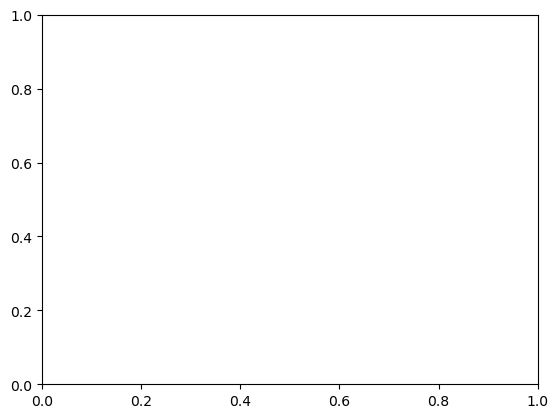

In [58]:
# Write your own code here
wdi_urban = pd.read_csv("data/wdi_urban.csv")

year = [wdi_urban["year"]]

plt.hist(wdi_urban["year"], wdi_urban["prop_urbanpopulation"], alpha = 0.5)
plt.legend(labels = ["1980","2020"])
plt.show()
